# Logistic regression

Энд логистик регресс хэрхэн ажилладаг талаар тайлбарлаж, энгийн Numpy дээр хэрэгжүүлнэ.
Логистик регресс нь хяналттай сургалтын ангиллын алгоритм бөгөөд энэ нь ангиллыг тооцоолох боломжтой гэсэн үг юм.
label-тэй ажиглалт дээр үндэслэсэн шинэ ажиглалт хийж шалгах дасгал ажил.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline

## Өгөгдлийн сан үүсгэх

Зөвхөн 100 ажиглалт, 2 онцлог бүхий хоёртын ангиллын бодлогод логистик регрессийг хэрэглэе.

In [22]:
X, y = make_classification(
        n_samples=100, 
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=10, 
        n_clusters_per_class=2)
print(X)
print(y)
print(X.shape)

[[ 1.23020423e+00 -9.87179836e-01]
 [-7.01939166e-01  3.17631796e-01]
 [-1.08751331e+00  1.61578263e+00]
 [-9.00803838e-01 -1.57968969e+00]
 [-1.46031271e+00  7.29759487e-01]
 [-1.24104620e+00  6.89266237e-01]
 [-2.04789476e+00 -7.66457149e-01]
 [-1.28266283e+00  4.81785391e-01]
 [ 7.44473957e-01  1.41311226e+00]
 [-2.78030289e+00 -5.34775584e-01]
 [-8.45582306e-01 -6.27896560e-01]
 [ 2.92390384e-01 -1.29187498e+00]
 [ 5.23676999e-01 -7.62128373e-01]
 [ 6.30503424e-01  1.80146793e+00]
 [ 2.54404497e+00  2.61425892e-01]
 [-7.15060658e-02 -1.04404916e-01]
 [-3.70488129e-01  1.42031763e+00]
 [ 2.08422059e+00 -1.44666827e+00]
 [-6.89671916e-01 -1.65752878e-01]
 [ 1.87867631e+00  2.24412997e-01]
 [-7.72578199e-01 -5.84716655e-02]
 [ 1.03948915e+00 -1.20154228e+00]
 [-5.93619101e-01 -1.09787720e+00]
 [-9.22514239e-01  1.43979166e+00]
 [ 4.26311244e+00 -6.82660376e-03]
 [-7.03134918e-01  2.16325750e+00]
 [ 7.08682975e-01  7.66583441e-01]
 [ 6.39970005e-01 -9.54428653e-01]
 [ 9.82998091e-01  7

Text(0, 0.5, '$X_2$')

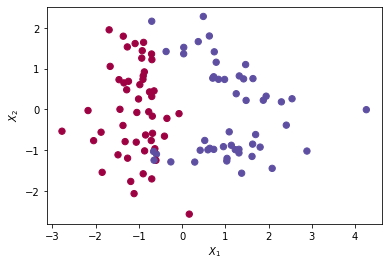

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# blue dots = 1, red dots = 0

Бидэнд $X$ 2 feature-тэй $\theta$ гэсэн 100 ажиглалт байгаа бөгөөд тэдгээрийн $y$ label-ийг бид мэднэ. Бид шинэ ажиглалтын label-ийг таамаглах боломжтой юу?

## Logistic regression

Логистик регресс нь ажиглалт тодорхой ангилалд хамаарах магадлалыг загварчилдаг.
Эдгээр магадлалыг үүсгэхийн тулд логистик регресс нь **sigmoid** функцийг ашигладаг. Энэ функц нь бодит тоог 0-ээс 1-ийн хоорондох утгуудад буулгадаг.

\begin{equation} 
g(z) = \frac{1}{1+e^{-z}}
\end{equation}

Дараах байдлаар таамаглалыг тодорхойлж болно $h(X) = g(X \theta)$
энд 
- $\theta$ коэффициэнт вектор.
- $X$ нь бүх ажиглалтын вектор юм.

$h(X)$ бидэнд 1 хүртэлх таамаглал өгнө,
- хэрэв $ X \theta \geqslant 0 $, бол $h(X) \geqslant 0.5$, таамаглал $y = 1$
- хэрэв $ X \theta < 0 $, бол $h(X) < 0.5$, таамаглал $y = 0$

In [55]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.00000000e+00  1.23020423e+00 -9.87179836e-01]
 [ 1.00000000e+00 -7.01939166e-01  3.17631796e-01]
 [ 1.00000000e+00 -1.08751331e+00  1.61578263e+00]
 [ 1.00000000e+00 -9.00803838e-01 -1.57968969e+00]
 [ 1.00000000e+00 -1.46031271e+00  7.29759487e-01]
 [ 1.00000000e+00 -1.24104620e+00  6.89266237e-01]
 [ 1.00000000e+00 -2.04789476e+00 -7.66457149e-01]
 [ 1.00000000e+00 -1.28266283e+00  4.81785391e-01]
 [ 1.00000000e+00  7.44473957e-01  1.41311226e+00]
 [ 1.00000000e+00 -2.78030289e+00 -5.34775584e-01]
 [ 1.00000000e+00 -8.45582306e-01 -6.27896560e-01]
 [ 1.00000000e+00  2.92390384e-01 -1.29187498e+00]
 [ 1.00000000e+00  5.23676999e-01 -7.62128373e-01]
 [ 1.00000000e+00  6.30503424e-01  1.80146793e+00]
 [ 1.00000000e+00  2.54404497e+00  2.61425892e-01]
 [ 1.00000000e+00 -7.15060658e-02 -1.04404916e-01]
 [ 1.00000000e+00 -3.70488129e-01  1.42031763e+00]
 [ 1.00000000e+00  2.08422059e+00 -1.44666827e+00]
 [ 1.00000000e+00 -6.89671916e-01 -1.65752878e-01]
 [ 1.00000000e+00  1.87867631e+

# Loss function

loss функцийг дараах байдалтай тодорхойлно,
\begin{equation} 
J(\theta) = \frac{1}{m}(-y \log(h) - (1 - y) \log(1 - h))
\end{equation}
энд $m$ жишээний тоо.

алдааг буруу ангилсан тохиолдлын жишээ,
- хэрэв $y=0$ болон $h\rightarrow 1$, тэгвэл $J(\theta)\rightarrow ∞$  (хүчтэй алдаа)
- хэрэв $y=0$ болон $h\rightarrow 0$, тэгвэл $J(\theta)\rightarrow 0$  (бага алдаа)
- хэрэв $y=1$ болон $h\rightarrow 0$, тэгвэл $J(\theta)\rightarrow ∞$  (хүчтэй алдаа)
- хэрэв $y=1$ болон $h\rightarrow 1$, тэгвэл $J(\theta)\rightarrow 0$  (бага алдаа)

In [56]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


## Gradiend descent

Таамаглалыг сайжруулахын тулд, бид алдааны $J(\theta)$ утгыг багасгах шаардлагатай. Үүнийг $\theta$ утгыг тохируулах замаар гүйцэтгэнэ. Энэ нь алдааны функцээс уламжлал авч $\theta$ бүрийг тохируулснаар хийгдэнэ. Градиент нь хэр их алдаа хэр хэмжээгээр коэффициэнтийг өөрлөхийг илэрхийлнэ. Энэ аргыг *Gradient Descent* гэдэг.
\begin{equation} 
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
энд $\alpha$ бол сурах хурд.

Ингэснээр бид
\begin{equation} 
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T (h - y) 
\end{equation}

In [57]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

print(gradient)
print(theta)

[ 0.         -0.52951312  0.00837904]
[ 0.00000000e+00  5.29513120e-03 -8.37903787e-05]


## Training the model

Бид дээрх алхамыг коэффициент тохиртол давтан хийх хэрэгтэй.

In [58]:
num_iter = 100000
cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)
    
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

Cost: 0.6903486449044123
Cost: 0.16583020255808859
Cost: 0.16255723360237326
Cost: 0.16194893689752632
Cost: 0.1617947856703522
Cost: 0.1617507453323905
Cost: 0.16173742474071925
Cost: 0.16173327485656203
Cost: 0.16173196117207167
Cost: 0.16173154162117448
Adjusted coefficient: [1.41307637 4.65877613 0.42728449]


## Plot the loss function

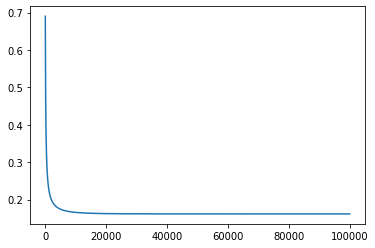

In [59]:
plt.plot(range(num_iter), cost_list)



Алдааны утга багасах нь сургалт амжилттай явагдаж буйн илрэл юм.

## Таамаглалуудыг дэвшүүлэх

Бид таамаглалын магадлалуудыг sigmoid функц авч гаргана.

In [60]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

[9.98797940e-01 1.51693249e-01 4.91254075e-02 3.05150791e-02
 6.19142868e-03 1.67219904e-02 2.12766567e-04 1.26582985e-02
 9.95869488e-01 7.74671678e-06 5.76170732e-02 9.02318869e-01
 9.71449772e-01 9.94060600e-01 9.99998449e-01 7.37948891e-01
 5.72959167e-01 9.99972598e-01 1.33452151e-01 9.99965041e-01
 9.87513120e-02 9.96803264e-01 1.39245827e-01 9.36797813e-02
 9.99999999e-01 2.81234681e-01 9.93582069e-01 9.81778094e-01
 9.98179674e-01 1.16348473e-01 1.26082731e-01 2.10600605e-02
 1.53318350e-02 1.15418258e-01 9.96242211e-01 9.99838377e-01
 9.99919747e-01 8.96943066e-01 4.13119705e-01 2.14063524e-01
 1.25385937e-01 3.15880890e-01 2.75032003e-03 1.94787033e-01
 9.96626172e-01 1.04877697e-01 9.98084123e-01 2.93514493e-02
 5.88270792e-03 5.29371024e-02 9.95835473e-01 8.10855775e-02
 9.99787887e-01 9.79450937e-01 1.00956914e-02 9.77462182e-01
 9.99163952e-01 9.99999461e-01 2.53473166e-03 9.99915169e-01
 9.60095858e-02 9.49454440e-01 6.85680530e-03 6.99711615e-02
 1.08459890e-01 9.982439

Өмнө нь үзсэнчлэн sigmoid функцийн шийдвэрийн хязгаарыг бид 0.5 гэж авсан ба үүнийг round функц ашиглан тэгшитгэж болно.

In [61]:
preds = preds_prob.round()
print(preds)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0.]


Эцэст нь бид сургалтын үр дүнг гаргах боломжтой боллоо.

In [62]:
score_numpy = (preds == y).mean()
print('Score Numpy: {}'.format(score_numpy))

Score Numpy: 0.93


Сургасан өгөгдөлд өндөр үр дүн үзүүлж байгаа боловч бид сургалтанд ашиглагдаагүй өгөгдлөөр туршиж үзэж болно.

In [63]:
new_x = np.array([1, -0.8, 0.8])   # new observation (-0.8, 0.8)  with an intercept of 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("predicted output for the new observation: ", preds_prob_new_x)

[ 1.  -0.8  0.8]
predicted output for the new observation:  0.0


## Шийдвэрийн хязгаарыг дүрсэлж харвал

(-2.569144526981861, 2.280835675462257)

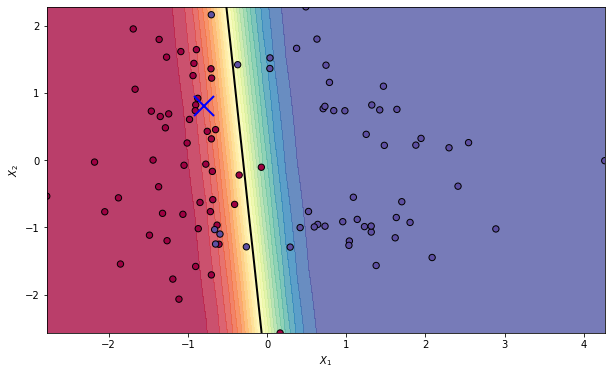

In [64]:
plt.figure(figsize=(10, 6))

# define 2d grid
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
grid = add_intercept(grid)
probs = calc_h(grid, theta)
probs = probs.reshape(xx1.shape)

# plot contours
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black') # decision boundary at 0.5
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)  # new observation correctly classified as 1 (blue)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])


## Sklearn хэрэгжүүлэлт

Мэдээж logistic regression нь аль хэдийн Scikit-learn хөгжүүлэгдсэн байгаа.

In [65]:
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

Score Sklearn: 0.93
[1.41543743] [[4.66287679 0.42777404]]
